<a href="https://colab.research.google.com/github/Danilosauro/Pokemon_Dataset_Analysis/blob/master/Kaggle_Analysis_Pokemon_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns

In [29]:
pokemons = pd.read_csv('/content/pokemon.csv')

## **Análise descritiva e ETL**

**1º Iniciamos com a análise das estatísticas descritivas do datasset, através do método *describe()*, a partir disto podemos avaliar as distribuições para cada atributo e pensar em possíveis testes a serem realizados**.  

**2º Em seguida, por conversão aplicamos os métodos *head()* e *tail()* para avaliar as cinco primeiras e cinco últimas ocorrências presentes no dataset.**

**3º Com o método *info()*, avaliamos as entradas presentes no dataset e podemos perceber em quais atributos temos presença de dados faltantes e dados duplicados, passíveis de tratamento, procedimento denominado Data Wrangling, em seguida através de comandos como *dropna()* e *drop_duplicates()*, retiramos duplicatas e dados faltantes.**

**4º Também percebemos que os dados presentes no atributo 'abilities' estavam com o padrão textual incomum, desta forma, convertemos para um padrão mais legível ao retirar os colchetes e aspas que atrapalhavam a leitura de maneira direta, para isto, utilizamos a função *str.replace()*, passando como parâmetro os ítens que desejévamos retirar, neste caso, colchetes e aspas.**  

In [30]:
pokemons.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [31]:
pokemons.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [32]:
pokemons.tail()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1
800,['Soul-Heart'],0.25,0.5,0.0,1.0,0.5,1.0,2.0,0.5,1.0,...,NaN,801,130,115,65,steel,fairy,80.5,7,1


In [71]:
pokemons.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [33]:
pokemons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [34]:
pokemons.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
796    False
797    False
798    False
799    False
800    False
Length: 801, dtype: bool

In [128]:
pokemons = pokemons.drop_duplicates()

In [36]:
pokemons.isna()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
797,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
798,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
799,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False


In [59]:
pokemons = pokemons.dropna()

In [ ]:
pokemons['abilities'] = pokemons['abilities'].str.replace('[', '').str.replace(']', '').str.replace("'", '')

##  **Analytics**

**1º Por serem dados categóricos, agrupamos as habilidades e tipos de pokemons de forma que possamos fazer avaliações quanto a frequência destes dados**  

**2º Avaliação gráfica da distribuição dos tipos de Pokemóns**  

**3º Avaliação em gráfico de barras da frequência das habilidades**

**4º Avaliação da relação da dispersão ataque x defesa**

**5º Avaliação da frequeência dos pokemons lendários**
****

In [ ]:
grouped_pokemons_type_one = pokemons.groupby(by = ['type1']).sum()
grouped_pokemons_type_two = pokemons.groupby(by = ['type2']).sum()
grouped_pokemons_generation = pokemons.groupby(by = ['generation']).sum()

In [62]:
grouped_pokemons_type_one.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
type1,,,,,,,,,,,,,,,,,,,,,
bug,39.5,48.5,46.0,60.0,42.5,22.0,112.0,103.00,50.0,19.50,...,46.9,2885,2488.1,19097,3006,3459,3327,1718.9,183,0
dark,29.0,10.0,20.0,20.5,42.0,36.0,19.5,19.00,10.5,12.50,...,17.3,1215,800.0,8965,1195,1295,1290,596.5,76,0
dragon,9.5,11.0,20.0,5.0,24.0,7.5,5.0,12.00,12.0,5.75,...,15.0,785,500.0,4516,1005,935,866,729.9,39,2
electric,4.0,5.5,4.5,4.0,5.5,7.5,7.0,2.75,4.0,4.50,...,3.9,372,350.0,4097,511,417,580,98.5,35,1
fairy,0.5,1.0,0.0,4.0,2.0,0.5,2.0,2.00,2.0,1.00,...,2.1,140,176.2,644,200,220,120,41.2,6,0


In [63]:
grouped_pokemons_type_two.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
type2,,,,,,,,,,,,,,,,,,,,,
bug,4.50,5.00,5.0,7.0,4.5,3.25,6.0,8.0,5.0,4.25,...,5.1,266,326.2,2649,230,389,254,178.7,24,0
dark,34.00,8.75,17.0,16.5,32.0,31.00,17.0,20.5,9.0,21.50,...,21.6,1261,926.2,7587,1336,1087,1260,1140.0,70,0
dragon,14.00,11.50,26.0,7.0,30.0,17.50,5.5,12.0,10.5,8.00,...,21.0,889,726.2,7860,1039,958,862,1344.1,67,0
electric,7.00,7.00,7.0,4.0,7.0,5.00,10.0,5.5,7.0,8.00,...,5.3,563,350.0,3625,567,491,418,115.9,33,0
fairy,14.75,14.00,0.0,22.5,21.0,11.75,28.5,26.5,24.0,21.00,...,13.4,1368,1036.5,9631,1526,1580,1347,282.5,92,0


## **Distribuição dos Pokémons por tipo**

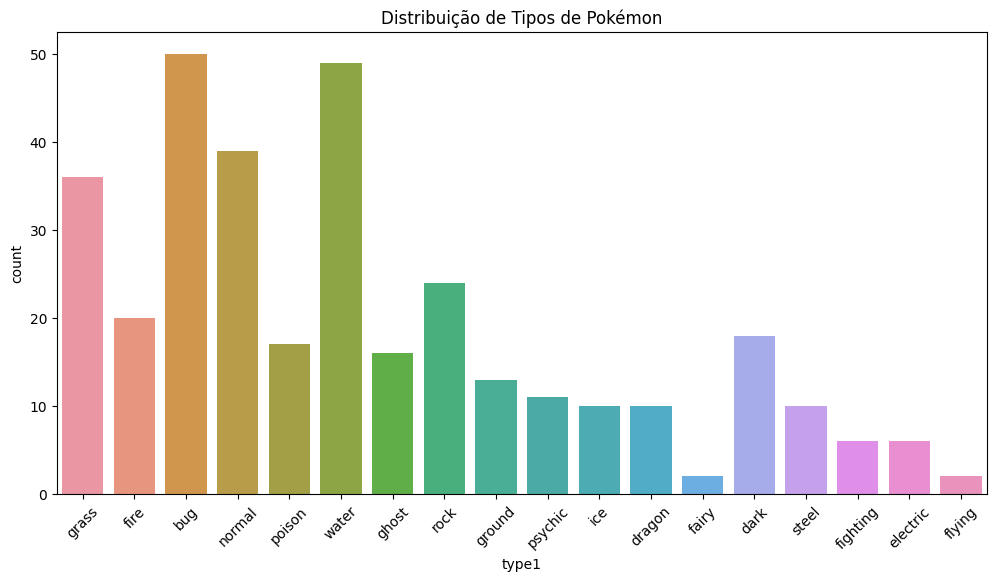

In [64]:
plt.figure(figsize=(12, 6))
sns.countplot(x='type1', data=pokemons)
plt.xticks(rotation=45)
plt.title('Distribuição de Tipos de Pokémon')
plt.show()

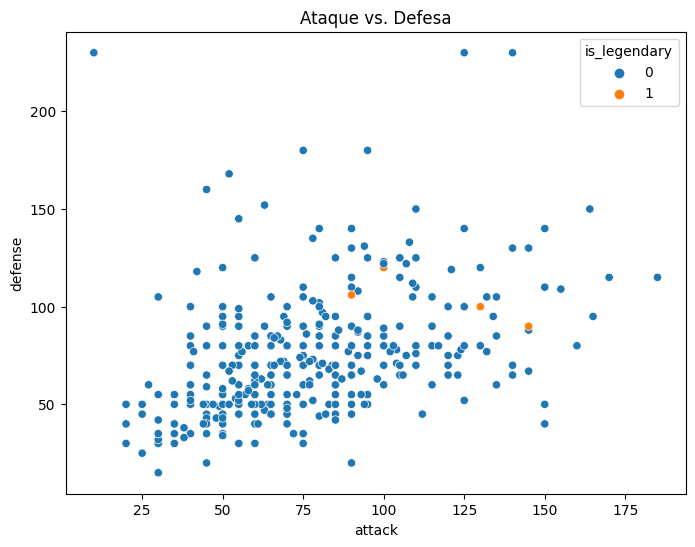

In [72]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='attack', y='defense', data= pokemons, hue='is_legendary')
plt.title('Ataque vs. Defesa')
plt.show()

## **Regressão linear para avaliar a correlação entre peso e poder de ataque dos pokemons**

In [176]:
correlacao = pokemons['weight_kg'].corr(pokemons['attack'])
correlacao

0.40839983523121914

In [189]:
from sklearn.linear_model import LinearRegression

pokemon_subset = pokemons[['weight_kg', 'attack']]

peso = pokemon_subset[['weight_kg']]
ataque = pokemon_subset['attack']

model = LinearRegression()
model.fit(peso, ataque)

coef = model.coef_[0]
intercept = model.intercept_

print('Intercept: ', intercept)

Intercept:  67.7802327715409


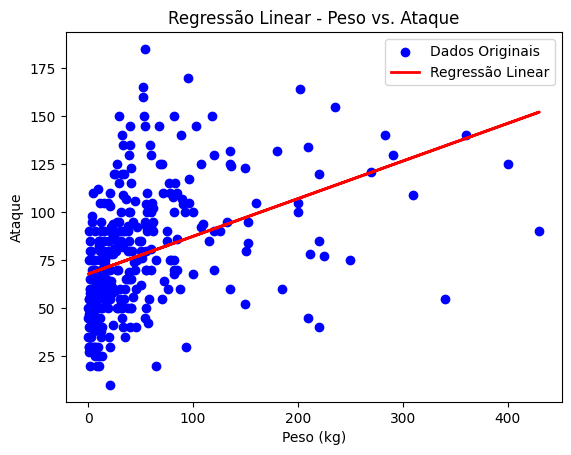

In [204]:
predictions = model.predict(peso)

plt.scatter(peso, ataque, color='blue', label='Dados Originais')

plt.plot(peso, predictions, color='red', linewidth=2, label='Regressão Linear')
plt.title('Regressão Linear - Peso vs. Ataque')
plt.xlabel('Peso (kg)')
plt.ylabel('Ataque')

plt.legend()
plt.show()

## **Regressão linear para evidenciar correlação positiva entre peso e poder de ataque dos pokemons**

In [205]:
correlacao_two = pokemons['weight_kg'].corr(pokemons['defense'])
correlacao_two

0.5574906456172983

In [207]:
pokemon_subset = pokemons[['weight_kg', 'defense']]

peso = pokemon_subset[['weight_kg']]
defesa = pokemon_subset[['defense']]

model = LinearRegression()
model.fit(peso, defesa)

coef = model.coef_[0]
intercept = model.intercept_

print('Intercept: ', intercept)

Intercept:  [60.80476564]


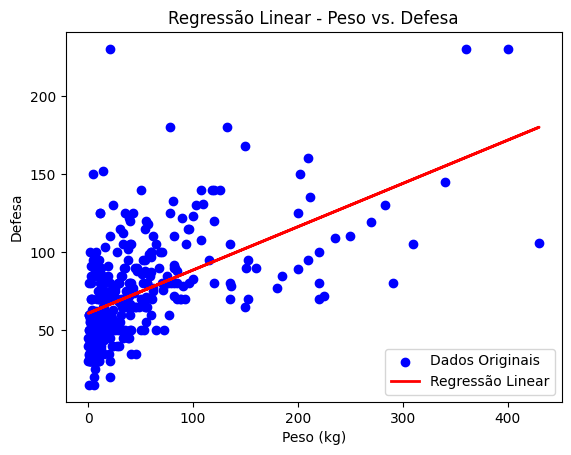

In [208]:
predictions = model.predict(peso)

plt.scatter(peso, defesa, color='blue', label='Dados Originais')

plt.plot(peso, predictions, color='red', linewidth=2, label='Regressão Linear')
plt.title('Regressão Linear - Peso vs. Defesa')
plt.xlabel('Peso (kg)')
plt.ylabel('Defesa')

plt.legend()
plt.show()

In [121]:
peso.describe()

,weight_kg
count,339.000000
mean,50.690855
std,66.826057
min,0.100000
25%,10.500000
50%,28.800000
75%,60.000000
max,430.000000


## **Avaliação do peso por tipo de Pokemón**

In [150]:
peso_por_tipo = pokemons.groupby('type1')['weight_kg'].median()
peso_por_tipo

type1
bug         21.90
dark        27.65
dragon      58.00
electric     5.50
fairy       20.60
fighting    42.75
fire        55.00
flying      46.50
ghost       15.00
grass       12.25
ground      64.80
ice         40.05
normal      19.50
poison      23.00
psychic     14.00
rock        58.00
steel       51.75
water       33.00
Name: weight_kg, dtype: float64

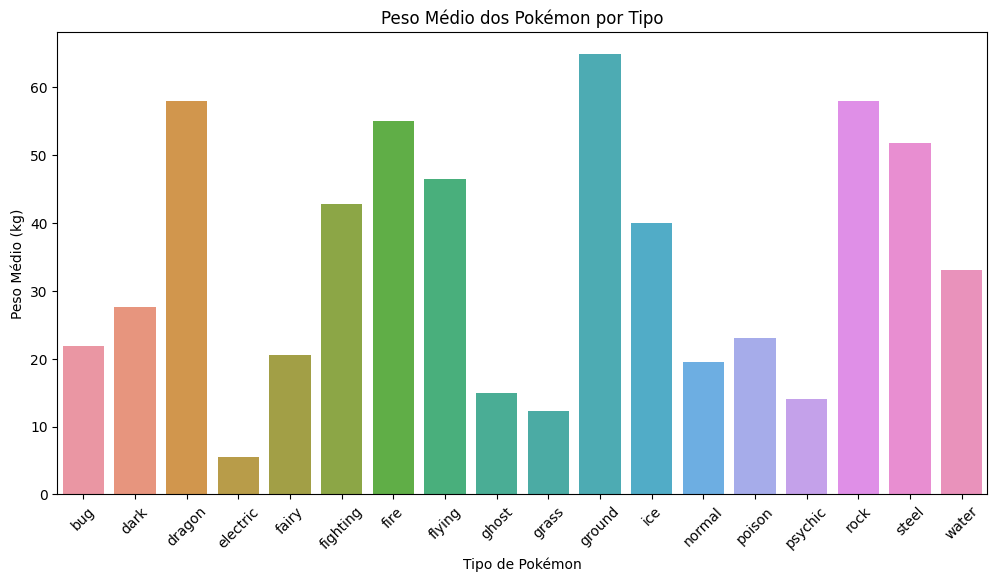

In [151]:
plt.figure(figsize=(12, 6))
sns.barplot(x=peso_por_tipo.index, y=peso_por_tipo.values)
plt.xticks(rotation=45)
plt.xlabel('Tipo de Pokémon')
plt.ylabel('Peso Médio (kg)')
plt.title('Peso Médio dos Pokémon por Tipo')
plt.show()

## **Avaliação peso dos pokemóns por Lendários ou não lendários**

In [152]:
peso_por_lendarios = pokemons.groupby('is_legendary')['weight_kg'].median()
peso_por_lendarios

is_legendary
0    28.2
1    61.0
Name: weight_kg, dtype: float64

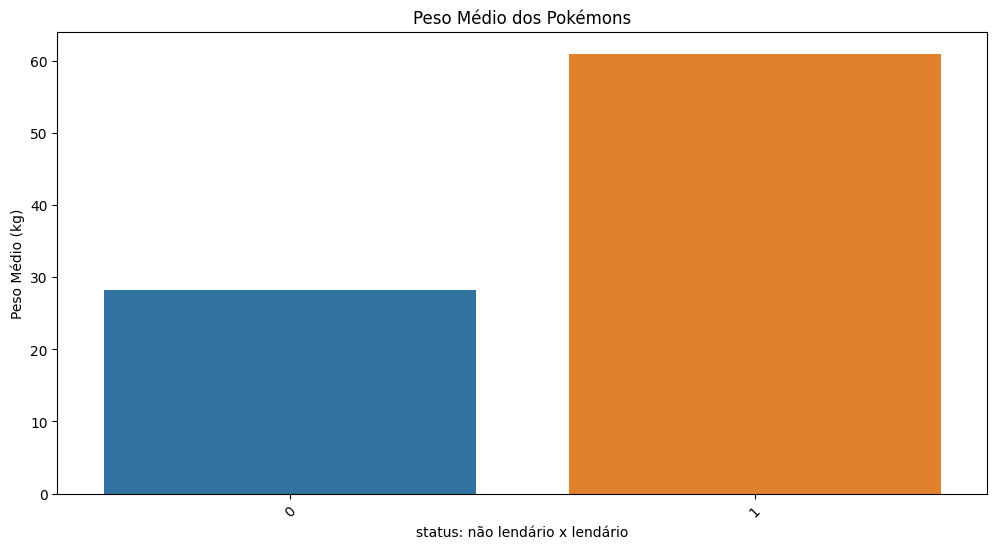

In [153]:
plt.figure(figsize=(12, 6))
sns.barplot(x=peso_por_lendarios.index, y=peso_por_lendarios.values)
plt.xticks(rotation=45)
plt.xlabel('status: não lendário x lendário')
plt.ylabel('Peso Médio (kg)')
plt.title('Peso Médio dos Pokémons')
plt.show()

## **Avaliação dos pesos dos pokemóns por altura**

In [183]:
correlacao_three = pokemons['weight_kg'].corr(pokemons['height_m'])
correlacao_three

0.6764180332043196

In [187]:
pokemon_subset = pokemons[['height_m', 'weight_kg']]

peso = pokemon_subset[['weight_kg']]
altura = pokemon_subset[['height_m']]

model = LinearRegression()
model.fit(peso, altura)

coef = model.coef_[0]
intercept = model.intercept_

print('Intercept: ', intercept)

Intercept:  [0.67428955]


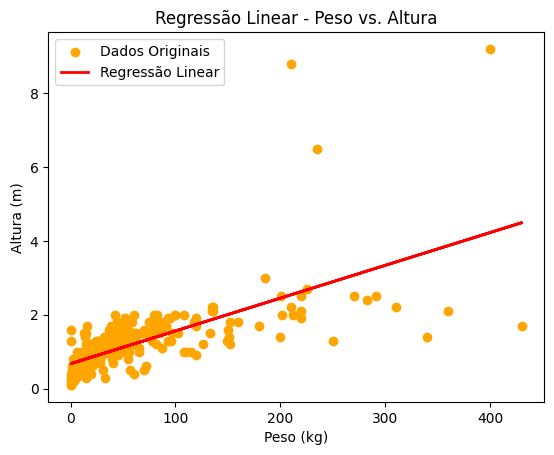

In [188]:
predictions = model.predict(peso)

plt.scatter(peso, altura, color='orange', label='Dados Originais')

plt.plot(peso, predictions, color='red', linewidth=2, label='Regressão Linear')
plt.title('Regressão Linear - Peso vs. Altura')
plt.xlabel('Peso (kg)')
plt.ylabel('Altura (m)')

plt.legend()
plt.show()

In [157]:
altura_por_tipos = pokemons.groupby('type1')['height_m'].median()
altura_por_tipos

type1
bug         1.00
dark        0.90
dragon      1.45
electric    0.45
fairy       1.05
fighting    1.25
fire        1.25
flying      1.00
ghost       1.00
grass       0.85
ground      1.10
ice         1.10
normal      0.70
poison      1.00
psychic     0.90
rock        1.30
steel       0.85
water       1.20
Name: height_m, dtype: float64

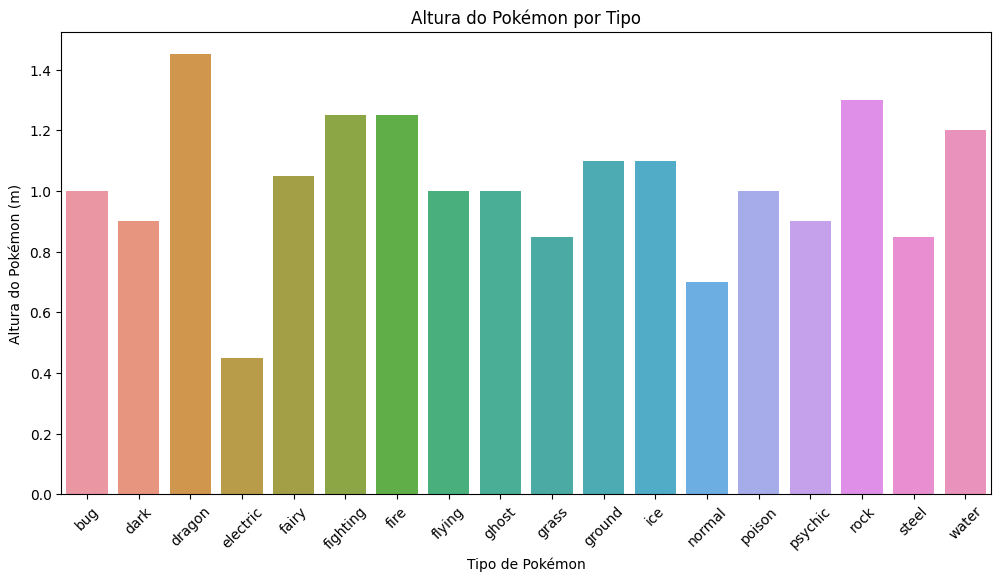

In [158]:
plt.figure(figsize=(12, 6))
sns.barplot(x=altura_por_tipos.index, y=altura_por_tipos.values)
plt.xticks(rotation=45)
plt.xlabel('Tipo de Pokémon')
plt.ylabel('Altura do Pokémon (m)')
plt.title('Altura do Pokémon por Tipo')
plt.show()

## **Avaliação do poder de ataque entre pokemons lendários e não lendários**

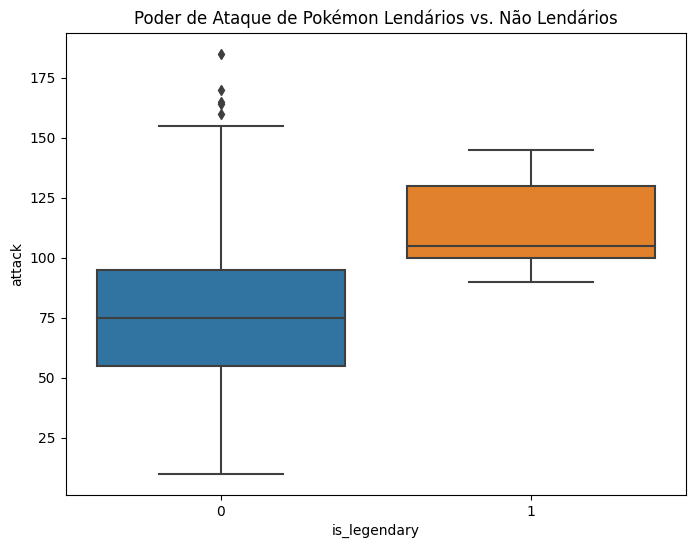

In [169]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_legendary', y='attack', data=pokemons)
plt.title('Poder de Ataque de Pokémon Lendários vs. Não Lendários')
plt.show()

## **Avaliação do Ataque por tipo de Pokemon**

In [190]:
ataque_por_tipo = pokemons.groupby('type1')['attack'].median()
ataque_por_tipo

type1
bug          65.0
dark         85.0
dragon      110.0
electric     66.5
fairy        45.0
fighting    112.0
fire         79.5
flying       50.0
ghost        65.5
grass        67.5
ground       95.0
ice          57.5
normal       75.0
poison       64.0
psychic      50.0
rock         80.5
steel        97.5
water        74.0
Name: attack, dtype: float64

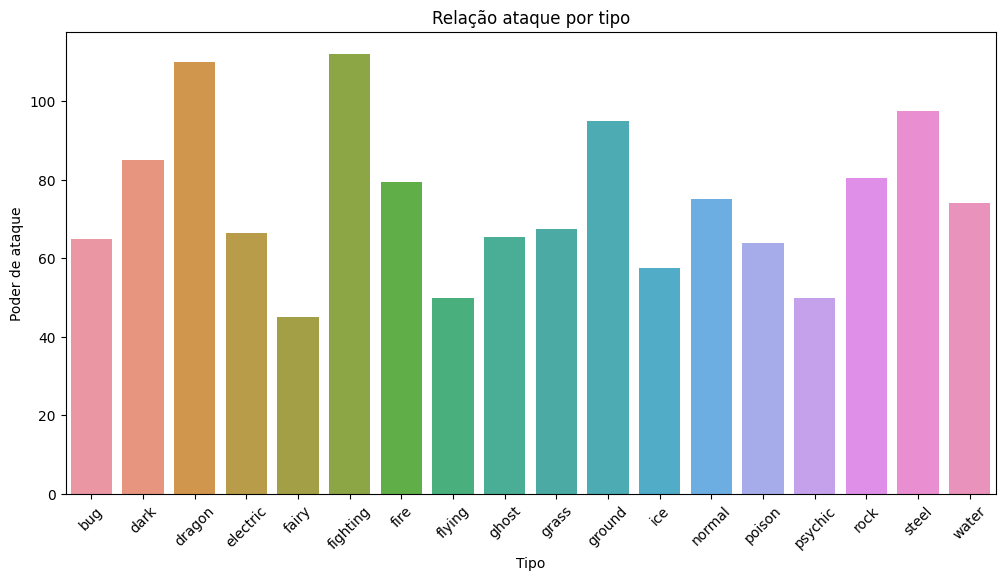

In [191]:
plt.figure(figsize=(12, 6))
sns.barplot(x=ataque_por_tipo.index, y=ataque_por_tipo.values)
plt.xticks(rotation=45)
plt.xlabel('Tipo')
plt.ylabel('Poder de ataque')
plt.title('Relação ataque por tipo')
plt.show()

## **Avaliação da defesa por tipo de Pokemon**


In [200]:
defesa_por_tipo = pokemons.groupby('type1')['defense'].median()
defesa_por_tipo

type1
bug          63.5
dark         70.0
dragon      105.0
electric     58.5
fairy        90.0
fighting     77.5
fire         71.5
flying       57.5
ghost        73.0
grass        65.0
ground       84.0
ice          60.0
normal       50.0
poison       67.0
psychic      55.0
rock         93.5
steel       132.5
water        70.0
Name: defense, dtype: float64

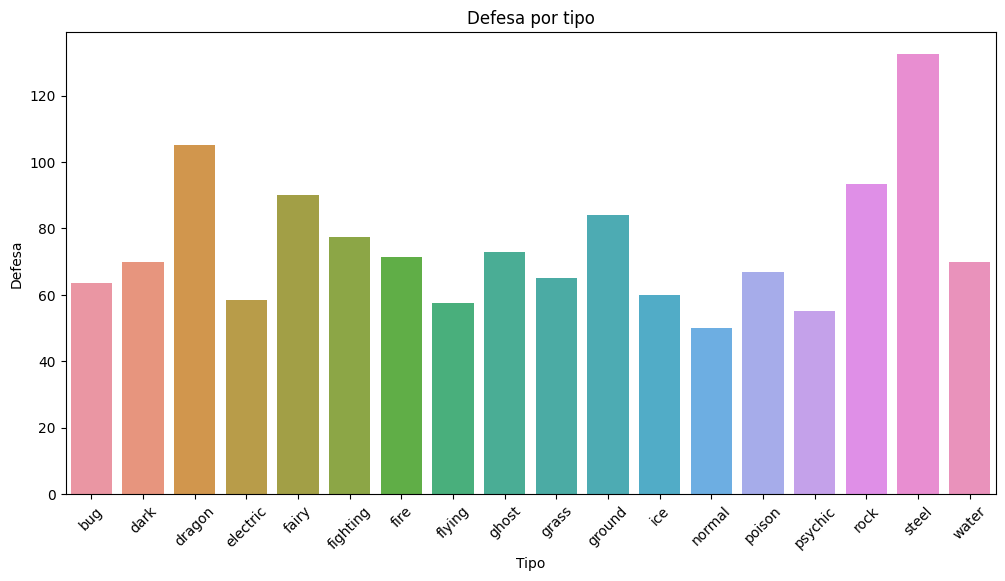

In [201]:
plt.figure(figsize=(12, 6))
sns.barplot(x=defesa_por_tipo.index, y=defesa_por_tipo.values)
plt.xticks(rotation=45)
plt.xlabel('Tipo')
plt.ylabel('Defesa')
plt.title('Defesa por tipo')
plt.show()

## **Avaliação da velocidade por tipo de pokemon**

In [202]:
velocidade_por_tipo = pokemons.groupby('type1')['speed'].median()
velocidade_por_tipo

type1
bug          65.0
dark         67.5
dragon       83.5
electric    101.0
fairy        60.0
fighting     80.0
fire         74.5
flying       89.0
ghost        55.5
grass        53.5
ground       74.0
ice          65.0
normal       70.0
poison       76.0
psychic      90.0
rock         53.0
steel        45.0
water        60.0
Name: speed, dtype: float64

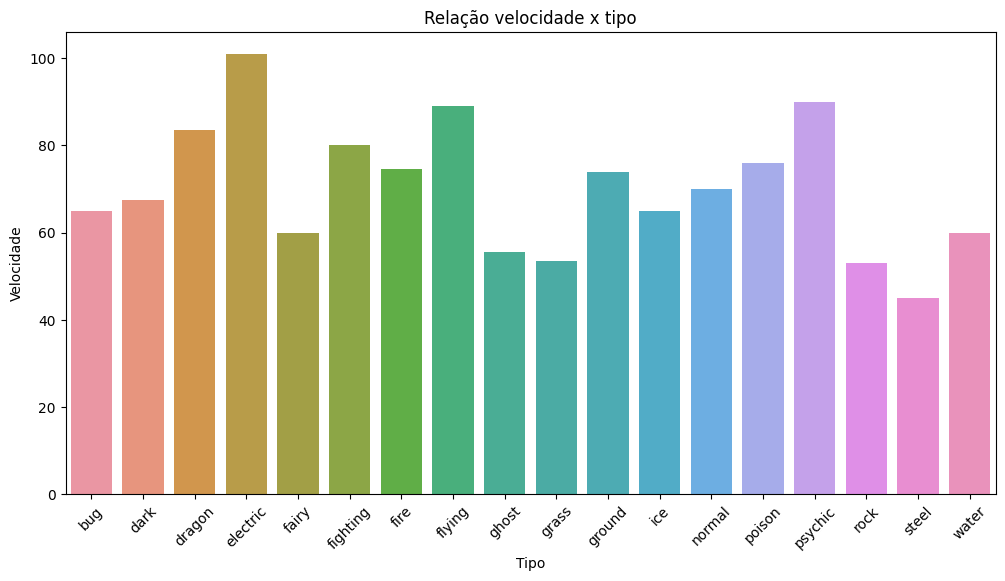

In [203]:
plt.figure(figsize=(12, 6))
sns.barplot(x=velocidade_por_tipo.index, y=velocidade_por_tipo.values)
plt.xticks(rotation=45)
plt.xlabel('Tipo')
plt.ylabel('Velocidade')
plt.title('Relação velocidade x tipo')
plt.show()

## **Árvore de decisão para avaliar probabilidade de ser lendário**

In [222]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


features = pokemons[['weight_kg', 'attack', 'defense', 'height_m']]
target = pokemons['is_legendary']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier()

clf.fit(features_train, target_train)


target_pred = clf.predict(features_test)


accuracy = accuracy_score(target_test, target_pred)
print("Acurácia do modelo: {:.2f}%".format(accuracy * 100))

confusion = confusion_matrix(target_test, target_pred)
print("Matriz de Confusão:")
print(confusion)


Acurácia do modelo: 95.59%
Matriz de Confusão:
[[65  1]
 [ 2  0]]


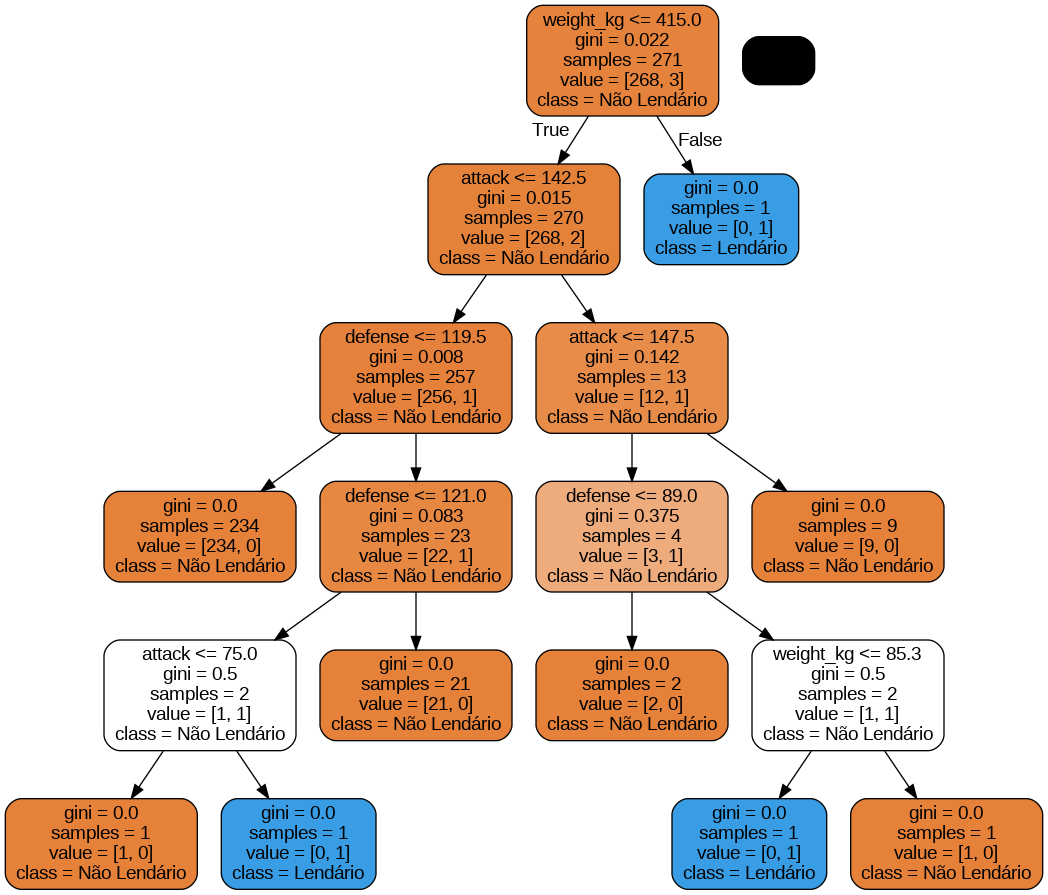

In [223]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(clf, feature_names=features.columns, class_names=['Não Lendário', 'Lendário'], filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())